# Heisenberg Hamiltonian 
\begin{equation}
H = J\sum_{i=1}^{N} \left[\frac{1}{2}(\hat{S}^{+}_i \hat{S}^{-}_{i+1}+\hat{S}^{-}_i \hat{S}^{+}_{i+1}) + \hat{S}^{z}_i \hat{S}^{z}_{i+1} + h_i \hat{S}^{z}_i\right]
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def check_nth_bit(num, n):
    return (num>>n)&1

# flip the bit of the integer 'int' at a position 'p'  (staring at 0)
def bitflip(int,p):
    mask = 1 << p
    return (int^ mask)

# count the numbers of 1 on a binarie representetion of an interger n
def CountBits(n):
    n = (n & 0x5555555555555555) + ((n & 0xAAAAAAAAAAAAAAAA) >> 1)
    n = (n & 0x3333333333333333) + ((n & 0xCCCCCCCCCCCCCCCC) >> 2)
    n = (n & 0x0F0F0F0F0F0F0F0F) + ((n & 0xF0F0F0F0F0F0F0F0) >> 4)
    n = (n & 0x00FF00FF00FF00FF) + ((n & 0xFF00FF00FF00FF00) >> 8)
    n = (n & 0x0000FFFF0000FFFF) + ((n & 0xFFFF0000FFFF0000) >> 16)
    n = (n & 0x00000000FFFFFFFF) + ((n & 0xFFFFFFFF00000000) >> 32) 
    return n

# defining n!
#@jit
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# finding the states that have the maginetization "z"
#@jit
def statep(y,z):
    a = 0
    for x in range(0,2**l):
        if (2* CountBits(x)-l) == z:
            y[a] = x
            a += 1
    return (y)

# numbers of states with magnatization x
def num_mag(x):
    y = p = int(factorial(l)//((factorial((x+l)/2))*(factorial(l -((x+l)/2)))))
    return y
            
# find the position in the list of states "s" that are iqual to "b"
#@jit
def find_state(s,b):
    for z in range(0,p+1):
        if s[z] == b:
            return(z)

In [3]:
# number of spins
l = 16
#dimension constant
j = -1

#anisotropy constant
delt = 1

#external MF 
h = 0
sigma= 10

In [4]:
mag = 0
p = num_mag(mag)
state = np.array(range(p))
s = statep(state,mag)
        
Hxxz_p = np.zeros((p,p))
for x in range(0,p):
    for y in range(0,l):
        if check_nth_bit(s[x],y) == 0:
            Hxxz_p[x,x] += -(j*np.random.normal(0,sigma))/2
        else:
            Hxxz_p[x,x] += (j*np.random.normal(0,sigma))/2
        k = (y+1)%l
                #if y != l-1:
        if check_nth_bit(s[x],y) == check_nth_bit(s[x],k):
            Hxxz_p[x,x] += -(j*delt)/4
        else:
            Hxxz_p[x,x] += (j*delt)/4
            b = bitflip(s[x],y)
            c = bitflip(b,k)
            D = np.where(s == c)
            Hxxz_p[x,D] = -j/2

In [5]:
Hxxz_p

array([[ 11.46576893,   0.5       ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.5       , -23.17657398,   0.5       , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.5       , -13.70611544, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   6.06353103,
          0.5       ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.5       ,
         -9.8144413 ,   0.5       ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.5       , -13.24239251]])

In [6]:
eig = (np.sort(np.linalg.eigvals(Hxxz_p)))
eig

array([-80.77128049, -77.21513048, -74.2146371 , ...,  72.85473081,
        73.01936488,  73.3932206 ])

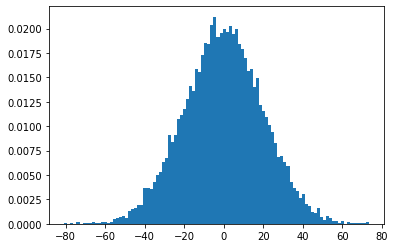

In [7]:
plt.hist(eig,bins=100, density=1)
plt.show()

In [8]:
sn = np.array([(eig[i+1] - eig[i]) for i in range(len(eig)-1)])
rn = np.array([(np.minimum(sn[i], sn[i-1])/(np.maximum(sn[i], sn[i-1]))) for i in range(1,len(eig)-1)])
rn.shape


(12868,)

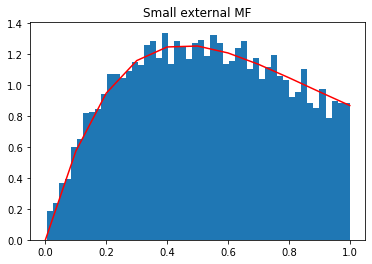

In [251]:
sn.shape
x = np.arange(0,1.05,.1)
#y = 2/(1+x)**2
y_2 = 27/4*(x + x*x)/(1+x+ x*x)**(1+3/2)
plt.hist(rn,density=1, bins=50)
#plt.plot(x,y,'-')
plt.plot(x,y_2, '-', color='red')
plt.title('Small external MF')
plt.show()

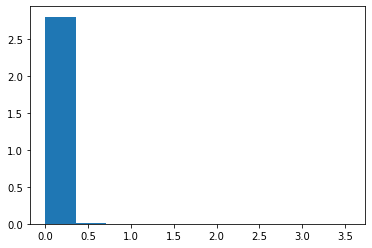

In [12]:
sn.shape
plt.hist(sn,density=1)
plt.show()

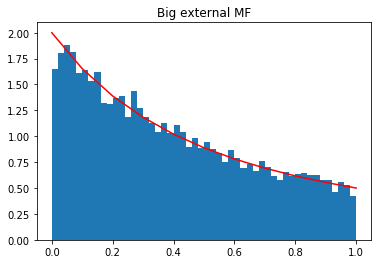

In [11]:
sn.shape
x = np.arange(0,1.05,.1)
y = 2/(1+x)**2
y_2 = 27/4*(x + x*x)/(1+x+ x*x)**(1+3/2)
plt.hist(rn,density=1, bins=50)
plt.plot(x,y,'-',color='red')
#plt.plot(x,y_2, '-', color='red')
plt.title('Big external MF')
plt.show()